# Importing Liberaries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

# Data Pre-Processing

In [2]:
digits=datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

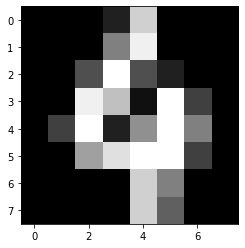

In [3]:
plt.imshow(digits.images[100],cmap=plt.cm.gray)

In [4]:
digits.images[1]
# i a trying to plot the 2nd image of my digits dataset

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [5]:
digits.images[100]

array([[ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16.,  5.,  2.,  0.,  0.],
       [ 0.,  0., 15., 12.,  1., 16.,  4.,  0.],
       [ 0.,  4., 16.,  2.,  9., 16.,  8.,  0.],
       [ 0.,  0., 10., 14., 16., 16.,  4.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  6.,  0.,  0.]])

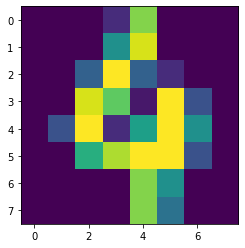

In [6]:
plt.imshow(digits.images[100])

In [7]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

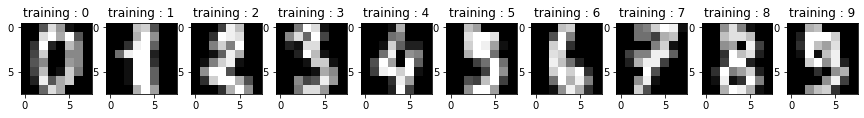

In [8]:
_,axes=plt.subplots(nrows=1,ncols=10, figsize=(15,5))
for ax,image,label in zip(axes,digits.images,digits.target):
  ax.imshow(image, cmap=plt.cm.gray)
  ax.set_title("training : %i" %label)

In [9]:
sc=StandardScaler()

x=digits.data
y=digits.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

x_train=sc.fit_transform(x_train)

In [10]:
lda=LinearDiscriminantAnalysis(n_components=9)
# 10 classes
# 10-1
# 9 components

In [11]:
x_train=lda.fit_transform(x_train,y_train)
x_test=lda.transform(x_test)
x_train.shape

(1437, 9)

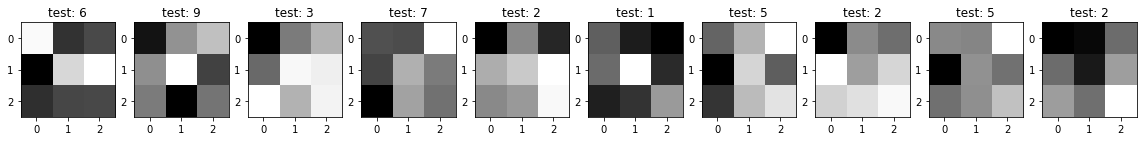

In [12]:
_,axes=plt.subplots(nrows=1,ncols=10,figsize=(20,5))
for ax,image,actual in zip(axes,x_test,y_test):
  image=image.reshape(3,3)
  ax.imshow(image,cmap=plt.cm.gray)
  ax.set_title(f"test: {actual}")

In [13]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)

rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred=rf.predict(x_test)

accuracy_score(y_test,y_pred)

0.8138888888888889

In [15]:
c=classification_report(y_test,y_pred)
print(c)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.59      0.61      0.60        28
           2       0.96      0.73      0.83        33
           3       0.85      0.85      0.85        34
           4       0.93      0.80      0.86        46
           5       0.75      0.98      0.85        47
           6       0.76      0.97      0.85        35
           7       1.00      0.74      0.85        34
           8       0.61      0.77      0.68        30
           9       0.85      0.70      0.77        40

    accuracy                           0.81       360
   macro avg       0.83      0.81      0.81       360
weighted avg       0.84      0.81      0.82       360

